In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [ ]:
%cd sample_data

[Errno 2] No such file or directory: 'sample_data'
/content/sample_data


In [ ]:
del_df = pd.read_csv("deliveries.csv")
match_df = pd.read_csv("matches.csv")

In [ ]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
import sweetviz as sv

my_report = sv.analyze(match_df)
my_report.show_html()

ModuleNotFoundError: ignored

In [ ]:
my_report_2 = sv.analyze(del_df)
my_report_2.show_html()

NameError: ignored

In [ ]:
match_df.shape

(756, 18)

In [ ]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


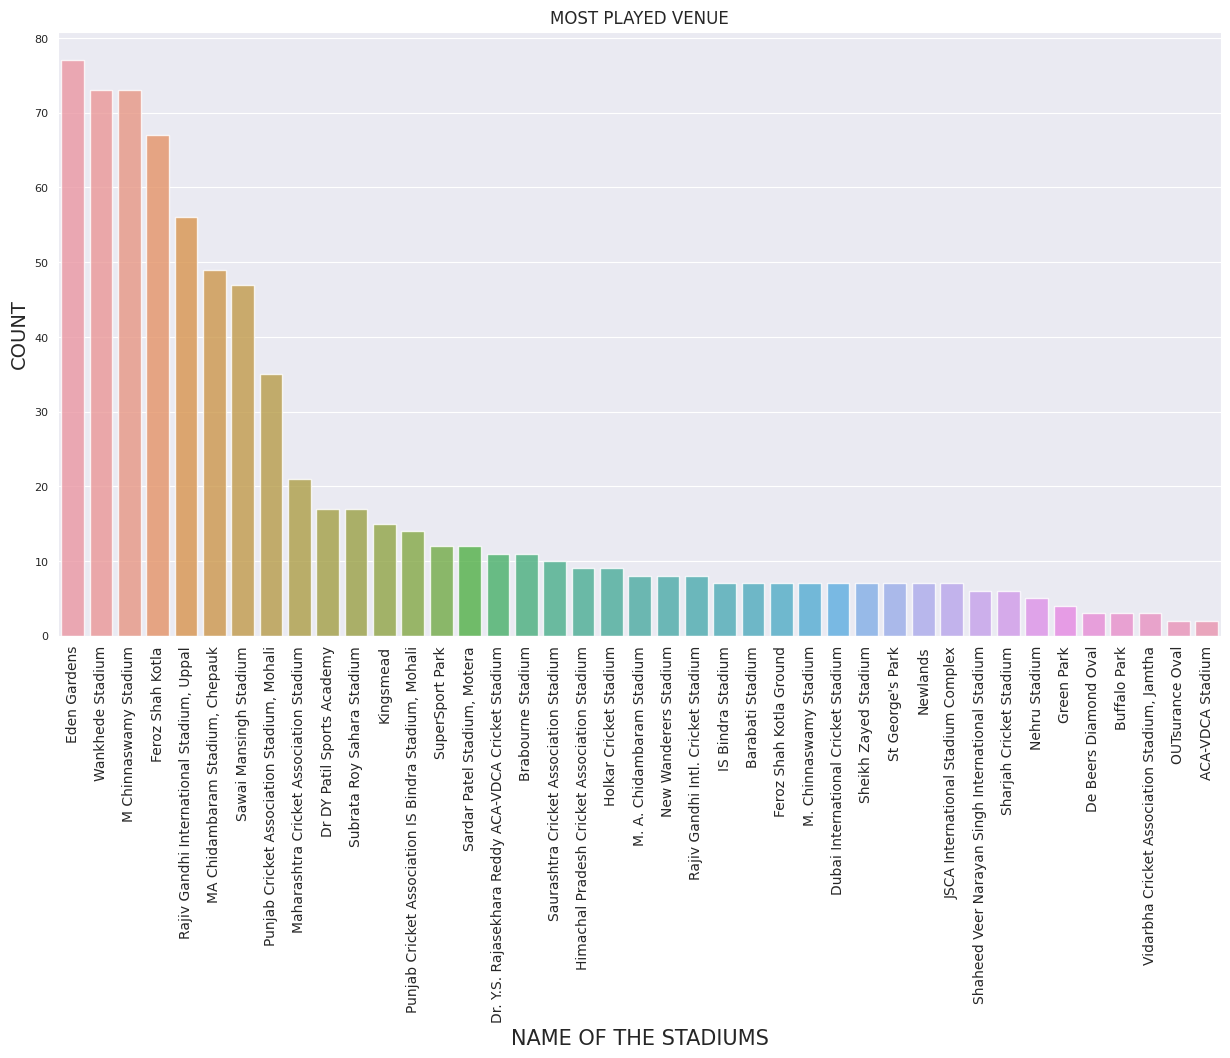

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("darkgrid")
ls=match_df['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE STADIUMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

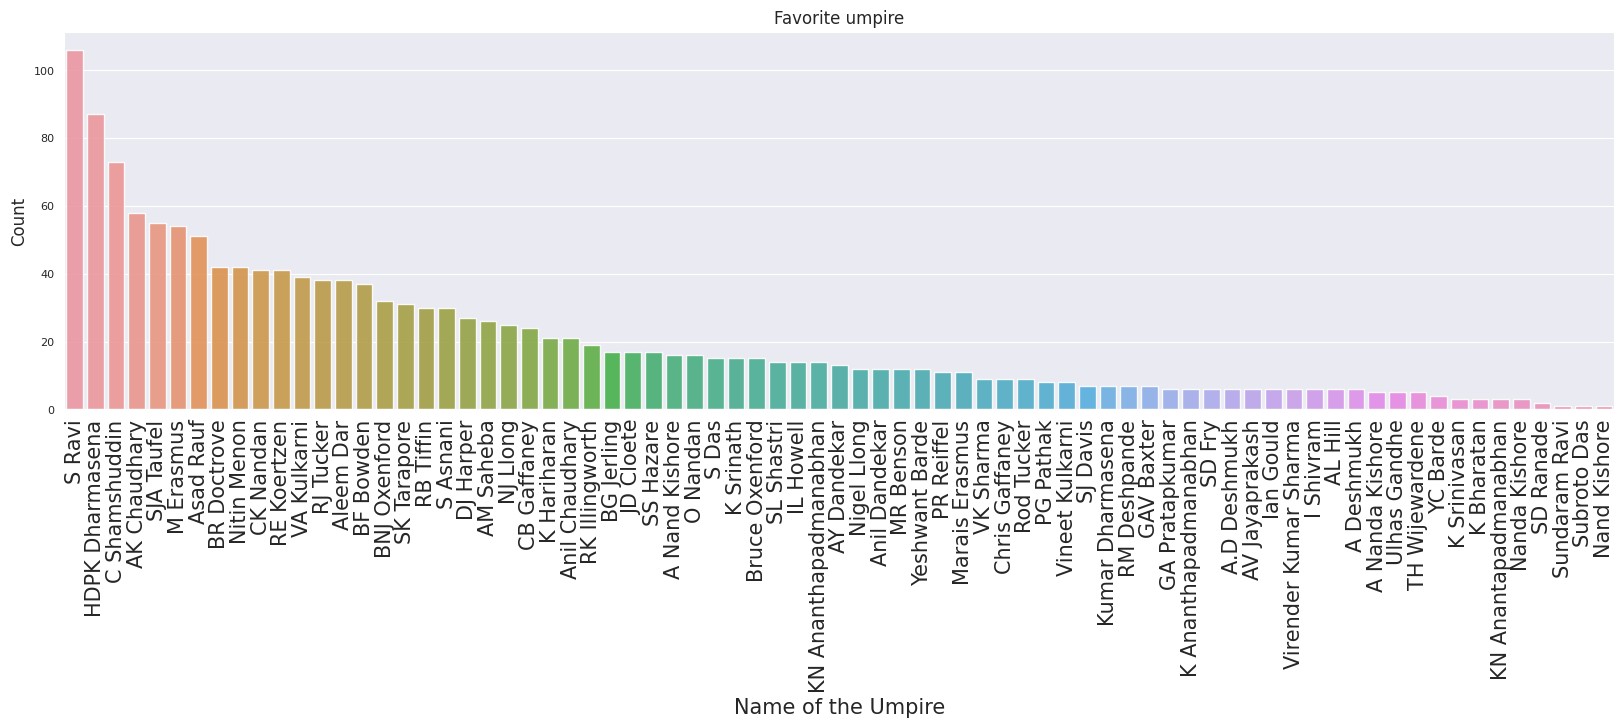

In [ ]:
temp=pd.concat([match_df['umpire1'],match_df['umpire2']]).value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
Most_umpired =sns.barplot(x=temp.index, y=temp.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=90,labels=temp.index,fontsize=15)
plt.show()

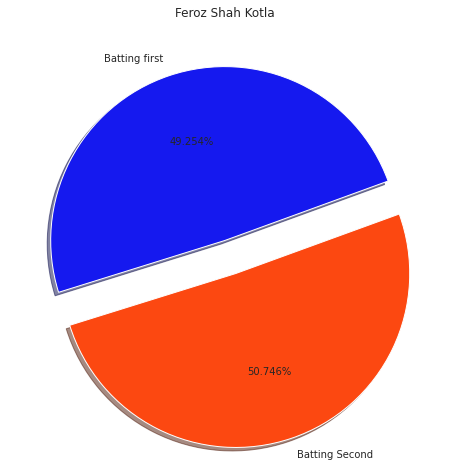

In [ ]:
Delhi_stadium=match_df.loc[(match_df['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct='%2.3f%%',colors=['#1519ef','#fc4811'])
plt.title('Feroz Shah Kotla')
plt.show()

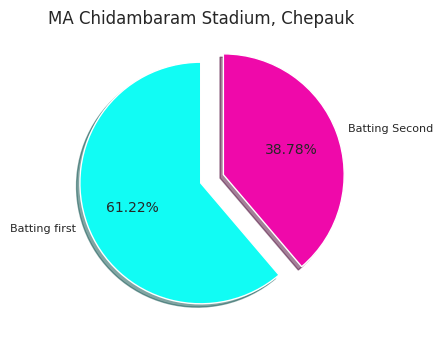

In [ ]:
Chennai_stadium=match_df.loc[(match_df['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%4.2f%%',colors=['#11fcf4','#ef09aa'])
plt.title('MA Chidambaram Stadium, Chepauk')
plt.show()

In [ ]:
batsman_grp = del_df.groupby(["match_id", "inning", "batting_team", "batsman"])
#batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen = match_df[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [ ]:
batsmen

,season,match_id,inning,batting_team,batsman,batsman_runs
0,2017,1.0,1.0,Sunrisers Hyderabad,BCJ Cutting,16.0
1,2017,1.0,1.0,Sunrisers Hyderabad,DA Warner,14.0
2,2017,1.0,1.0,Sunrisers Hyderabad,DJ Hooda,16.0
3,2017,1.0,1.0,Sunrisers Hyderabad,MC Henriques,52.0
4,2017,1.0,1.0,Sunrisers Hyderabad,S Dhawan,40.0
...,...,...,...,...,...,...
5681,2019,NaN,NaN,NaN,NaN,NaN
5682,2019,NaN,NaN,NaN,NaN,NaN
5683,2019,NaN,NaN,NaN,NaN,NaN
5684,2019,NaN,NaN,NaN,NaN,NaN


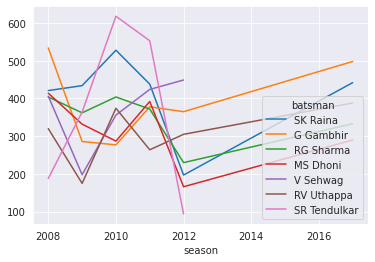

In [ ]:
batsman_runsperseason = batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1)
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:7].T.plot()

In [ ]:
batsman_runsperseason

season,2008,2009,2010,2011,2012,2017,Total
batsman,,,,,,,
A Ashish Reddy,NaN,NaN,NaN,NaN,10.0,NaN,10.0
A Chopra,42.0,11.0,NaN,NaN,NaN,NaN,53.0
A Choudhary,NaN,NaN,NaN,NaN,NaN,25.0,25.0
A Flintoff,NaN,62.0,NaN,NaN,NaN,NaN,62.0
A Kumble,13.0,16.0,6.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...
YV Takawale,70.0,18.0,NaN,NaN,NaN,NaN,88.0
Yashpal Singh,NaN,47.0,NaN,NaN,NaN,NaN,47.0
Younis Khan,3.0,NaN,NaN,NaN,NaN,NaN,3.0


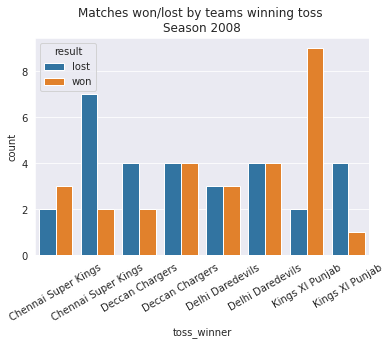

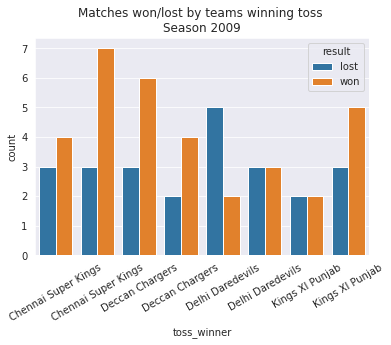

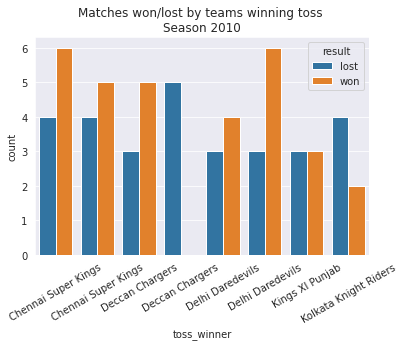

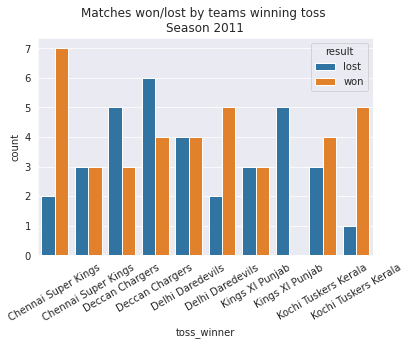

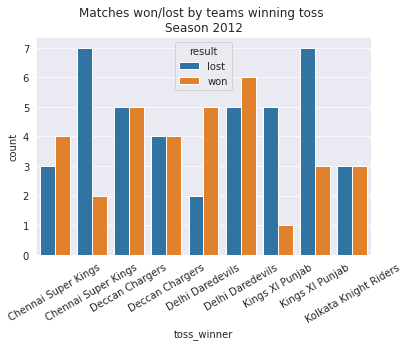

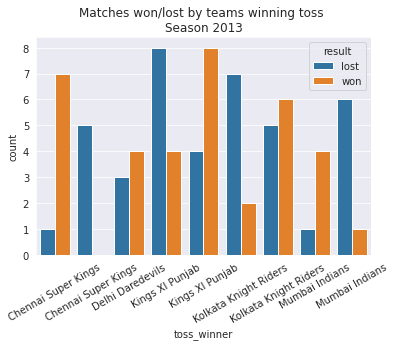

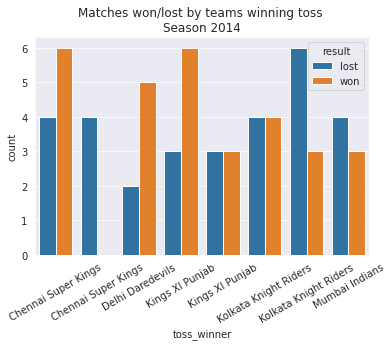

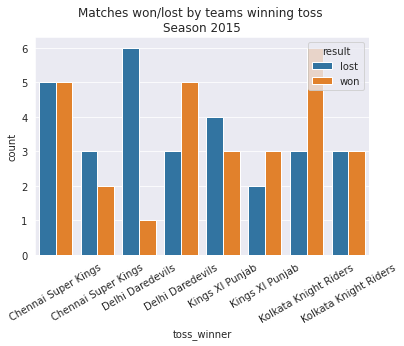

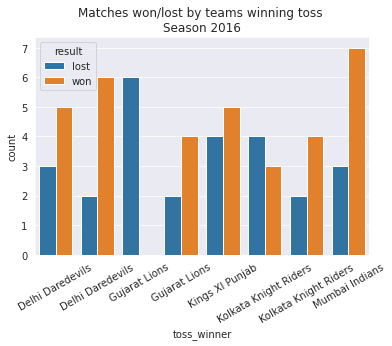

In [ ]:
import numpy as np
toss = match_df.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2017, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1